In [2]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

%matplotlib inline



In [3]:
shp_path = './colombia/ADMINISTRATIVO/MGN_MPIO_POLITICO.shp'
sf = shp.Reader(shp_path)
len(sf.shapes())

1122

In [3]:
sf.records()[100]

Record #100: ['05', '05001', '05001000', '050011000000000911', 0.0290988574079, 3.26567503192e-05, '0911']

In [4]:
#sf.records()

In [4]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.plot(x_lon,y_lat) 
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

def plot_shapes(ids, s = None):
    plt.figure(figsize = (20, 20))
    ax = plt.axes()
    ax.set_aspect('equal')
    for id in ids:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)        
        #if(x0 > -75.48):
        ax.plot(x_lon,y_lat) 
        ax.text(x0, y0, id, fontsize=10)
        # use bbox (bounding box) to set plot limits
        #ax.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
        
    

def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [5]:
df = read_shapefile(sf)
df.shape

(1122, 11)

In [6]:
df.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CCNCT,MPIO_NANO,DPTO_CNMBR,Shape_Leng,Shape_Area,coords
0,18,001,FLORENCIA,Decreto 642 de Junio 17 de 1912,2547.637532,18001,2018,CAQUETÁ,2.942508,0.206928,"[(-75.42073632899996, 2.194132686000046), (-75..."
1,18,029,ALBANIA,Ordenanza 3 de Noviembre 12 de 1985,414.122070,18029,2018,CAQUETÁ,1.112829,0.033618,"[(-75.89506366399996, 1.3656954220000443), (-7..."
2,18,094,BELÉN DE LOS ANDAQUÍES,Decreto 963 de Marzo 14 de 1950,1191.618572,18094,2018,CAQUETÁ,2.234657,0.096745,"[(-75.78705295799995, 1.7498207150000553), (-7..."
3,18,247,EL DONCELLO,Decreto 1678 de Septiembre 7 de 1967,1106.076151,18247,2018,CAQUETÁ,3.154370,0.089867,"[(-75.36166845099996, 2.3214277260000244), (-7..."
4,18,256,EL PAUJÍL,Decreto 1678 de Septiembret 7 de 1967,1234.734145,18256,2018,CAQUETÁ,3.529316,0.100309,"[(-75.36638150299996, 2.2095241550000537), (-7..."


In [25]:
df[(df['DPTO_CCDGO'] == '05') & (df['MPIO_CNMBR'] == 'MEDELLÍN')]

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CCNCT,MPIO_NANO,DPTO_CNMBR,Shape_Leng,Shape_Area,coords
282,05,001,MEDELLÍN,1965,374.830625,05001,2018,ANTIOQUIA,1.032922,0.030607,"[(-75.66974281299997, 6.3735990120000565), (-7..."


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

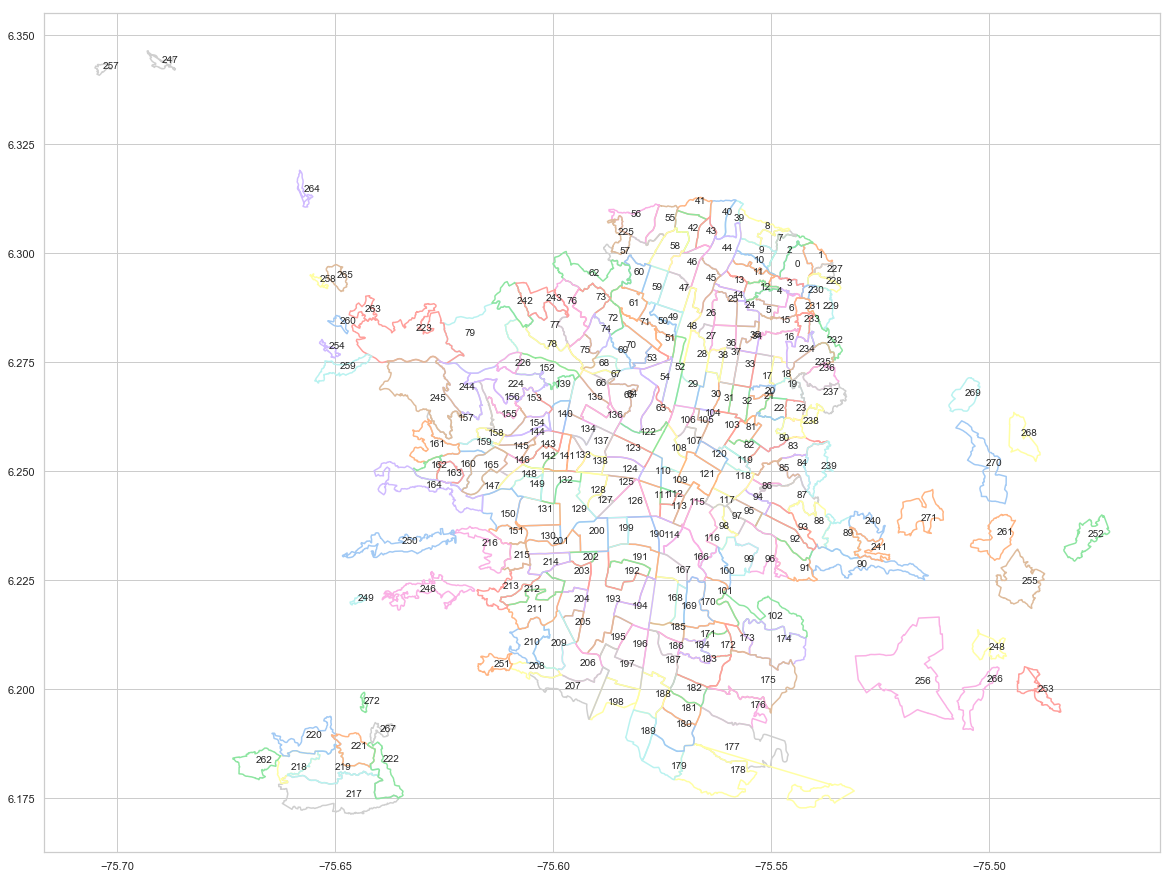

In [35]:
idxs = list(df[(df['DPTO_CCDGO'] == '05') & (df['MPIO_CCDGO'] == '05001')].index)
print(idxs)
plot_shapes(idxs)